<a href="https://colab.research.google.com/github/rumeysaegilmez/DeepLearning/blob/main/Satellite_Images_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

import warnings
warnings.filterwarnings('ignore')

import splitfolders
from glob import glob
import os

In [5]:
dataset = "data"
splitfolders.ratio(dataset, output="Satellite_Images", seed=101, ratio=(.7, .2, .1))

Copying files: 5631 files [00:00, 7219.55 files/s]


In [6]:
training_dir = 'Satellite_Images/train'
validation_dir = 'Satellite_Images/val'
test_dir = 'Satellite_Images/test'

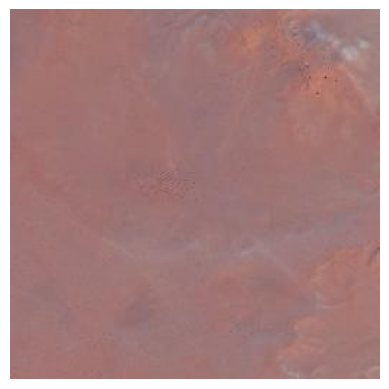

In [7]:
img = load_img(training_dir + "/desert/desert(1).jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [8]:
x = img_to_array(img)
print(x.shape)

(256, 256, 3)


In [9]:
className = glob(training_dir + '/*')
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)

labels = os.listdir(training_dir)
print("LabelsOfClass: ",labels)

NumberOfClass:  4
LabelsOfClass:  ['water', 'green_area', 'desert', 'cloudy']


In [10]:
Total_TrainImages = glob('Satellite_Images/train/*/*.jpg')
print("Total number of training images: ", len(Total_TrainImages))

train_image_names = pd.Series(Total_TrainImages)
train_df = pd.DataFrame()
train_df['Filename'] = train_image_names.map( lambda img_name: img_name.split("/")[-1])
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head(10)

Total number of training images:  3941


,Filename,ClassId
0,SeaLake_1108.jpg,water
1,SeaLake_8.jpg,water
2,SeaLake_96.jpg,water
3,SeaLake_2336.jpg,water
4,SeaLake_2315.jpg,water
5,SeaLake_2817.jpg,water
6,SeaLake_280.jpg,water
7,SeaLake_1006.jpg,water
8,SeaLake_144.jpg,water
9,SeaLake_102.jpg,water


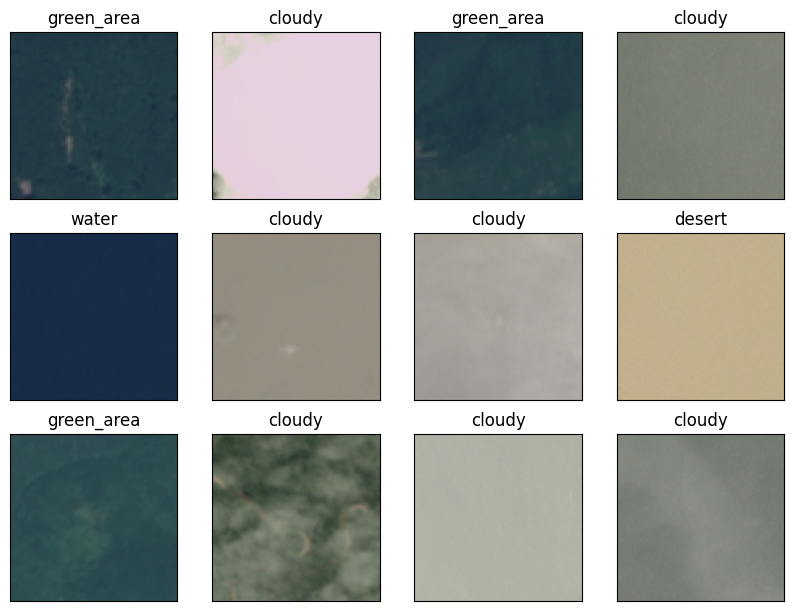

In [11]:
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(10, 10))

for i in range(12):
    img_name = plot_df.loc[i, 'Filename']
    label = (plot_df.loc[i, 'ClassId'])
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(os.path.join(training_dir,label, img_name)))
    plt.title(label)
    plt.xticks([])
    plt.yticks([])

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.1,
    rotation_range=10,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(64,64),
    batch_size=32,
    shuffle = True,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(
    rescale=1./255
    )
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(64,64),
    batch_size=32,
    shuffle = True,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(
    rescale=1./255
    )
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64,64),
    batch_size=1,
    shuffle = False,
    class_mode='categorical'
)

Found 3941 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.
Found 564 images belonging to 4 classes.


In [13]:
# Create a Sequential model
model = Sequential()

# Convolutional layers
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding="same"))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation="softmax"))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 75)        2100      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 32, 32, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 50)        2

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_generator, epochs=40, validation_data=val_generator)

Epoch 1/40
124/124 [==============================] - 97s 769ms/step - loss: 0.5116 - accuracy: 0.7988 - val_loss: 1.4506 - val_accuracy: 0.2673
Epoch 2/40
124/124 [==============================] - 86s 692ms/step - loss: 0.3332 - accuracy: 0.8747 - val_loss: 1.3892 - val_accuracy: 0.3028
Epoch 3/40
124/124 [==============================] - 86s 695ms/step - loss: 0.2622 - accuracy: 0.9066 - val_loss: 1.2374 - val_accuracy: 0.5231
Epoch 4/40
124/124 [==============================] - 87s 706ms/step - loss: 0.2355 - accuracy: 0.9104 - val_loss: 1.4226 - val_accuracy: 0.6545
Epoch 5/40
124/124 [==============================] - 85s 686ms/step - loss: 0.2228 - accuracy: 0.9196 - val_loss: 0.6985 - val_accuracy: 0.6323
Epoch 6/40
124/124 [==============================] - 91s 737ms/step - loss: 0.2036 - accuracy: 0.9231 - val_loss: 0.1165 - val_accuracy: 0.9654
Epoch 7/40
124/124 [==============================] - 86s 691ms/step - loss: 0.2086 - accuracy: 0.9211 - val_loss: 0.1285 - val_ac

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


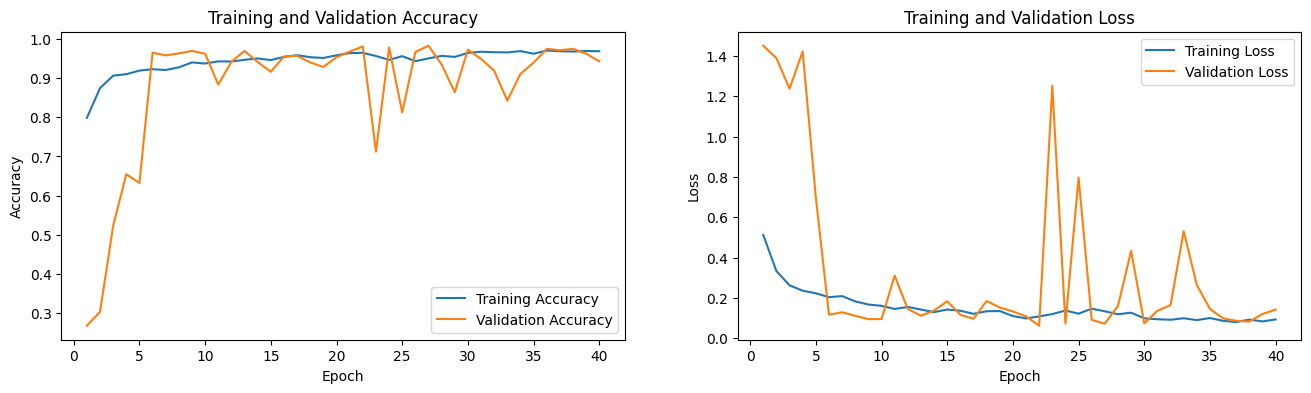

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

564/564 [==============================] - 7s 12ms/step - loss: 0.1731 - accuracy: 0.9273
Test loss: 0.17309191823005676
Test accuracy: 0.9273049831390381


In [19]:
predict=model.predict(test_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

564/564 [==============================] - 6s 10ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [20]:
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
import seaborn
print(classification_report(test_generator.classes, y_classes))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       150
           1       0.85      1.00      0.92       114
           2       0.95      0.92      0.94       150
           3       0.92      0.97      0.94       150

    accuracy                           0.93       564
   macro avg       0.93      0.93      0.93       564
weighted avg       0.93      0.93      0.93       564

